EDA de los datasets limpios y elección de las variables para el modelo de recomendación

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import parquet
import numpy as np
import folium
from folium.plugins import MarkerCluster

%load_ext autoreload
%autoreload 2
import utils

import warnings
warnings.filterwarnings("ignore")

Se lee el Dataset que se creo anteriormente y se guarda en un dataframe para facilitar su uso.

In [3]:
df_siniestros_totales = pd.read_parquet('../Datasets_limpios/siniestrostotales.parquet')
df_siniestros_totales.head()

,id_feu,siniestro_fecha,siniestro_hora,zona_ocurrencia,via_publica,nombre_via,altura_km,entre_calle_1,latitud,longitud,...,estado_fisico_ambiental,luminosidad,luz_artificial,estado_ambiental,visibilidad,semaforo,tipo_involucrado,anio,mes,dia
0,49056,2018-10-29,20:10:00,Urbana,Avenida,AV INDEPENDENCIA,4200,LAS PIEDRAS,-27.48105,-58.80054,...,Seca,Atardecer,None,Despejado,Buena,Funciona,Motocicleta,2018,10,29
1,49056,2018-10-29,20:10:00,Urbana,Avenida,AV INDEPENDENCIA,4200,LAS PIEDRAS,-27.48105,-58.80054,...,Seca,Atardecer,None,Despejado,Buena,Funciona,Motocicleta,2018,10,29
2,49056,2018-10-29,20:10:00,Urbana,Avenida,AV INDEPENDENCIA,4200,LAS PIEDRAS,-27.48105,-58.80054,...,Seca,Atardecer,None,Despejado,Buena,Funciona,Automóvil,2018,10,29
3,49059,2018-10-31,19:30:00,Urbana,Calle,BELASCOAIN,900,VIUDES,-27.48406,-58.77596,...,"Despejada, Seca",Noche,NO,Nublado,Buena,Sin Semáforo,Motocicleta,2018,10,31
4,49059,2018-10-31,19:30:00,Urbana,Calle,BELASCOAIN,900,VIUDES,-27.48406,-58.77596,...,"Despejada, Seca",Noche,NO,Nublado,Buena,Sin Semáforo,Automóvil,2018,10,31


Vamos a repasar un poco los datos que tenemos

In [4]:
utils.verificar_tipo_datos(df_siniestros_totales)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,id_feu,[<class 'int'>],100.00,0.00,0
1,siniestro_fecha,[<class 'pandas._libs.tslibs.timestamps.Timest...,100.00,0.00,0
2,siniestro_hora,[<class 'datetime.time'>],100.00,0.00,0
3,zona_ocurrencia,"[<class 'str'>, <class 'NoneType'>]",99.13,0.87,60
4,via_publica,"[<class 'str'>, <class 'NoneType'>]",97.63,2.37,163
5,nombre_via,"[<class 'str'>, <class 'NoneType'>]",99.55,0.45,31
6,altura_km,"[<class 'str'>, <class 'NoneType'>]",91.25,8.75,602
7,entre_calle_1,"[<class 'str'>, <class 'NoneType'>]",79.16,20.84,1434
8,latitud,[<class 'float'>],100.00,0.00,0
9,longitud,[<class 'float'>],100.00,0.00,0


* Datos Generales

El  conjunto de datos presenta 28 variables (columnas) y 6880 registros lo que se pueden ver a continuación.

In [5]:
df_siniestros_totales.columns

Index(['id_feu', 'siniestro_fecha', 'siniestro_hora', 'zona_ocurrencia',
       'via_publica', 'nombre_via', 'altura_km', 'entre_calle_1', 'latitud',
       'longitud', 'ilesos', 'heridos', 'fallecidos', 'vehiculos', 'peatones',
       'tipo_siniestro_unico', 'cantidad_de_involucrados',
       'material_de_la_calzada', 'estado_de_la_calzada',
       'estado_fisico_ambiental', 'luminosidad', 'luz_artificial',
       'estado_ambiental', 'visibilidad', 'semaforo', 'tipo_involucrado',
       'anio', 'mes', 'dia'],
      dtype='object')

In [6]:
df_siniestros_totales.shape[0]

6880

Vamos a echarle un último vistazo a los valores que podemos normalizar

In [7]:
# Summary statistics and data types
data_summary = df_siniestros_totales.describe(include='all')
data_types = df_siniestros_totales.dtypes

# Check for missing values
missing_values = df_siniestros_totales.isnull().sum()

print(missing_values)


id_feu                         0
siniestro_fecha                0
siniestro_hora                 0
zona_ocurrencia               60
via_publica                  163
nombre_via                    31
altura_km                    602
entre_calle_1               1434
latitud                        0
longitud                       0
ilesos                         5
heridos                        3
fallecidos                    11
vehiculos                      1
peatones                      15
tipo_siniestro_unico        2150
cantidad_de_involucrados       0
material_de_la_calzada       167
estado_de_la_calzada         186
estado_fisico_ambiental      420
luminosidad                  189
luz_artificial              1145
estado_ambiental             224
visibilidad                 1499
semaforo                     719
tipo_involucrado               2
anio                           0
mes                            0
dia                            0
dtype: int64


Las columnas con más datos nulos son, 'entre_calle_1', 'tipo_siniestro_unico', 'luz_artificial' y 'visibilidad'. Vamos a mostrar columnas relacionadas a estas para poder normalizarlas.

In [8]:
# Se ven los valores nulos
df_siniestros_totales[df_siniestros_totales['entre_calle_1'].isnull()][['entre_calle_1', 'nombre_via']][:15]

,entre_calle_1,nombre_via
12,None,AVENIDA MAIPU
13,None,AVENIDA MAIPU
14,None,AVENIDA MAIPU
22,None,AV CAZADORES CORRENTINOS
23,None,AV CAZADORES CORRENTINOS
30,None,AVENIDA MAIPU
31,None,AVENIDA MAIPU
32,None,AV ARTIGAS
37,None,LOS ANGELES
38,None,LOS ANGELES


Los comparamos con los datos NO nulos

In [9]:
# Se ven los valores nulos de cruce en relación con 'Lugar del hecho' y 'Tipo de calle'
df_siniestros_totales[df_siniestros_totales['entre_calle_1'].notnull()][['entre_calle_1', 'nombre_via']][:15]

,entre_calle_1,nombre_via
0,LAS PIEDRAS,AV INDEPENDENCIA
1,LAS PIEDRAS,AV INDEPENDENCIA
2,LAS PIEDRAS,AV INDEPENDENCIA
3,VIUDES,BELASCOAIN
4,VIUDES,BELASCOAIN
5,SAN JUAN,BELGRANO
6,SAN JUAN,BELGRANO
7,ESPAÑA,AVENIDA FERRE
8,ESPAÑA,AVENIDA FERRE
9,ESPAÑA,AVENIDA FERRE


De esta manera, entendemos que se tratan de siniestros viales que ocurrieron sobre Avenidas, Rutas o Calles sin ser una interjección. Por lo cual se decide cambiar el significado de las columnas. Se le cambia el nombre a 'ubicacion_accidente' y los valores nulos toman la altura que se encuentra en 'altura_km'.

In [10]:
# Suponiendo que ya tienes el dataframe df_siniestros_totales
# Crear la nueva columna 'cruce'
df_siniestros_totales['cruce'] = np.where(df_siniestros_totales['entre_calle_1'].isnull(), 'NO', 'SI')

# Crear la nueva columna 'lugar_del_hecho'
df_siniestros_totales['lugar_del_hecho'] = np.where(
    df_siniestros_totales['entre_calle_1'].isnull(),
    df_siniestros_totales['nombre_via'] + ' ' + df_siniestros_totales['altura_km'].astype(str),
    df_siniestros_totales['nombre_via'] + ' y ' + df_siniestros_totales['entre_calle_1']
)

# Seleccionar solo las columnas relevantes para la visualización final
df_resultado = df_siniestros_totales[['cruce', 'lugar_del_hecho']]

print(df_resultado)

     cruce                 lugar_del_hecho
0       SI  AV INDEPENDENCIA y LAS PIEDRAS
1       SI  AV INDEPENDENCIA y LAS PIEDRAS
2       SI  AV INDEPENDENCIA y LAS PIEDRAS
3       SI             BELASCOAIN y VIUDES
4       SI             BELASCOAIN y VIUDES
...    ...                             ...
6875    SI              AV MAIPU y TILCARA
6876    SI         AV 3 DE ABRIL y CORDOBA
6877    SI         AV 3 DE ABRIL y CORDOBA
6878    SI    12 y COLECTORA (BOCA UNIDOS)
6879    SI    12 y COLECTORA (BOCA UNIDOS)

[6880 rows x 2 columns]


Vamos a graficarlo


In [11]:
# Función para filtrar datos por año y mes
def filtrar_por_fecha(df, anio, mes):
    return df[(df['anio'] == anio) & (df['mes'] == mes)]

# Filtrar datos por año y mes específicos (diciembre de 2018)
df_filtrado = filtrar_por_fecha(df_siniestros_totales, 2018, 12)

# Verificar el DataFrame filtrado
print(df_filtrado.head())

# Crear el mapa centrado en Corrientes
m = folium.Map(location=[-27.4692, -58.8306], zoom_start=12)

# Crear un MarkerCluster
marker_cluster = MarkerCluster().add_to(m)

# Añadir marcadores al mapa
if not df_filtrado.empty:
    for idx, row in df_filtrado.iterrows():
        folium.Marker(
            location=[row['latitud'], row['longitud']],
            popup=row['lugar_del_hecho']
        ).add_to(marker_cluster)
else:
    print("No hay datos para el año y mes seleccionados.")

# Guardar el mapa en un archivo HTML
m.save('mapa_siniestros_corrientes.html')

    id_feu siniestro_fecha siniestro_hora zona_ocurrencia via_publica  \
20   49190      2018-12-25       08:32:00          Urbana     Avenida   
21   49190      2018-12-25       08:32:00          Urbana     Avenida   
22   49127      2018-12-02       00:30:00          Urbana     Avenida   
23   49127      2018-12-02       00:30:00          Urbana     Avenida   
24   49180      2018-12-21       00:35:00          Urbana     Avenida   

                  nombre_via altura_km              entre_calle_1   latitud  \
20               AV PAYSANDU      1300                    COSQUIN -27.49474   
21               AV PAYSANDU      1300                    COSQUIN -27.49474   
22  AV CAZADORES CORRENTINOS      3200                       None -27.51558   
23  AV CAZADORES CORRENTINOS      3200                       None -27.51558   
24                  AV FERRE      2900  BOLIVIA BANDA CENTRAL SUR -27.47853   

    longitud  ...  luz_artificial  estado_ambiental  visibilidad  \
20 -58.82483  ... 

Analizamos la columna 'tipo_siniestro_unico'

In [12]:
df_siniestros_totales['tipo_siniestro_unico'].unique()

array(['Colisión entre vehículos', 'Despiste', 'Caída desde vehículo',
       'Atropello a animal/es', 'Vuelco (solo 1 participante)',
       'Atropello a peatón/es', None, 'Choque', 'Otro', 'Despeñamiento',
       'Salida de calzada', 'S/D'], dtype=object)

In [13]:
# Se ven los valores nulos
df_siniestros_totales[df_siniestros_totales['tipo_siniestro_unico'].isnull()][['tipo_siniestro_unico', 'lugar_del_hecho', 'tipo_involucrado']][:15]

,tipo_siniestro_unico,lugar_del_hecho,tipo_involucrado
143,None,9 DE julio y SALTA,Automóvil
144,None,9 DE julio y SALTA,Automóvil
505,None,AVENIDA CENTENARIO y AVENIDA CHACABUCO,Motocicleta
506,None,AVENIDA CENTENARIO y AVENIDA CHACABUCO,Automóvil
646,None,AV. MAIPU 820,Motocicleta
647,None,AV. MAIPU 820,Bicicleta
648,None,AV. MAIPU 820,Bicicleta
722,None,Av tres de abril y MENDOZA,Automóvil
723,None,Av tres de abril y MENDOZA,Automóvil
724,None,Av tres de abril y MENDOZA,Automóvil


Podemos observar que esta columna está muy segmentada, por lo cual decidimos normalizar los datos nulos asignándolos a la categoría de mayor tamaño. Además, los valores de 'Choque' también se sumaran a colisión y los S/D se asignarán a otro. 

In [14]:
# Suponiendo que ya tienes el dataframe df_siniestros_totales
# Crear una nueva columna 'es_colision' para indicar si el valor es asumido
df_siniestros_totales['es_colision'] = np.where(df_siniestros_totales['tipo_siniestro_unico'].isnull(), 'Asumido', 'Real')

# Reemplazar los valores nulos por 'Colisión entre vehículos'
df_siniestros_totales['tipo_siniestro_unico'] = df_siniestros_totales['tipo_siniestro_unico'].fillna('Colisión entre vehículos')

# Normalizar valores de 'Choque' y 'S/D'
df_siniestros_totales['tipo_siniestro_unico'] = df_siniestros_totales['tipo_siniestro_unico'].replace({
    'Choque': 'Colisión entre vehículos',
    'S/D': 'Otro'
})

print(df_siniestros_totales[['tipo_siniestro_unico', 'es_colision']])


          tipo_siniestro_unico es_colision
0     Colisión entre vehículos        Real
1     Colisión entre vehículos        Real
2     Colisión entre vehículos        Real
3     Colisión entre vehículos        Real
4     Colisión entre vehículos        Real
...                        ...         ...
6875  Colisión entre vehículos        Real
6876  Colisión entre vehículos        Real
6877  Colisión entre vehículos        Real
6878  Colisión entre vehículos        Real
6879  Colisión entre vehículos        Real

[6880 rows x 2 columns]


In [15]:
df_siniestros_totales['tipo_siniestro_unico'].unique()

array(['Colisión entre vehículos', 'Despiste', 'Caída desde vehículo',
       'Atropello a animal/es', 'Vuelco (solo 1 participante)',
       'Atropello a peatón/es', 'Otro', 'Despeñamiento',
       'Salida de calzada'], dtype=object)

Grafiquemos esta columna

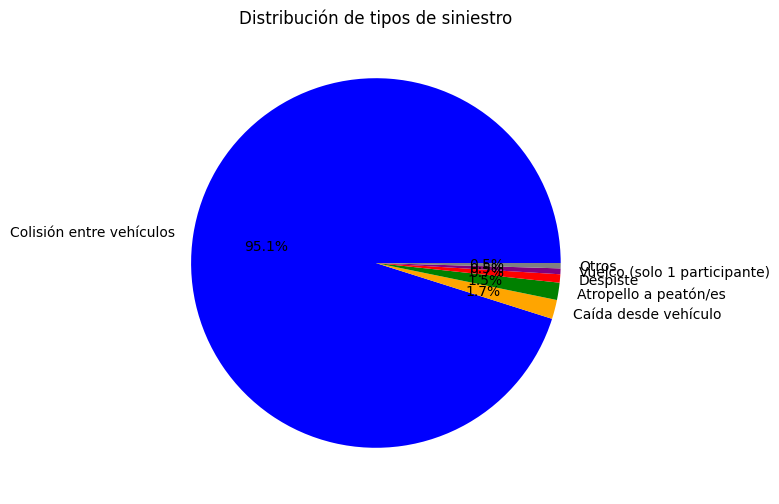

In [16]:
# Contar la frecuencia de cada tipo de siniestro
siniestro_counts = df_siniestros_totales['tipo_siniestro_unico'].value_counts()

# Obtener las 5 categorías más comunes
top_5_siniestros = siniestro_counts.nlargest(5).index

# Crear una nueva columna para la gráfica
df_siniestros_totales['tipo_siniestro_para_grafico'] = df_siniestros_totales['tipo_siniestro_unico'].apply(lambda x: x if x in top_5_siniestros else 'Otros')

# Contar la frecuencia para la gráfica de torta
grafico_counts = df_siniestros_totales['tipo_siniestro_para_grafico'].value_counts()

# Graficar torta
plt.figure(figsize=(10,6))
grafico_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange', 'green', 'red', 'purple', 'gray'])
plt.title('Distribución de tipos de siniestro')
plt.ylabel('')  # Eliminar etiqueta del eje y
plt.show()

Analizamos luz y visibilidad

In [17]:
# Suponiendo que ya tienes el dataframe df_siniestros_totales
# Mostrar las primeras filas de las columnas de interés
print(df_siniestros_totales[['luz_artificial', 'visibilidad']].head())

# Mostrar el resumen de las columnas para ver los valores únicos y la cantidad de nulos
print(df_siniestros_totales[['luz_artificial', 'visibilidad']].describe(include='all'))

# Contar los valores nulos en cada columna
nulos_luz_artificial = df_siniestros_totales['luz_artificial'].isnull().sum()
nulos_visibilidad = df_siniestros_totales['visibilidad'].isnull().sum()

print(f"Valores nulos en luz_artificial: {nulos_luz_artificial}")
print(f"Valores nulos en visibilidad: {nulos_visibilidad}")


  luz_artificial visibilidad
0           None       Buena
1           None       Buena
2           None       Buena
3             NO       Buena
4             NO       Buena
       luz_artificial visibilidad
count            5735        5381
unique              2           4
top                NO       Buena
freq             4458        5258
Valores nulos en luz_artificial: 1145
Valores nulos en visibilidad: 1499


Como se puede observar, los valores más recurrentes son NO para luz artificial y Buena para visibilidad. Por lo cual, decido que mis datos nulos tomen estos valores.

In [18]:
# Rellenar valores nulos en 'luz_artificial' y 'visibilidad' con los valores más frecuentes
df_siniestros_totales['luz_artificial'] = df_siniestros_totales['luz_artificial'].fillna('NO')
df_siniestros_totales['visibilidad'] = df_siniestros_totales['visibilidad'].fillna('Buena')

# Verificar los primeros resultados
print(df_siniestros_totales[['luz_artificial', 'visibilidad']].head())
print(df_siniestros_totales[['luz_artificial', 'visibilidad']].isnull().sum())


  luz_artificial visibilidad
0             NO       Buena
1             NO       Buena
2             NO       Buena
3             NO       Buena
4             NO       Buena
luz_artificial    0
visibilidad       0
dtype: int64


Grafiquemos nuestras nuevas columnas

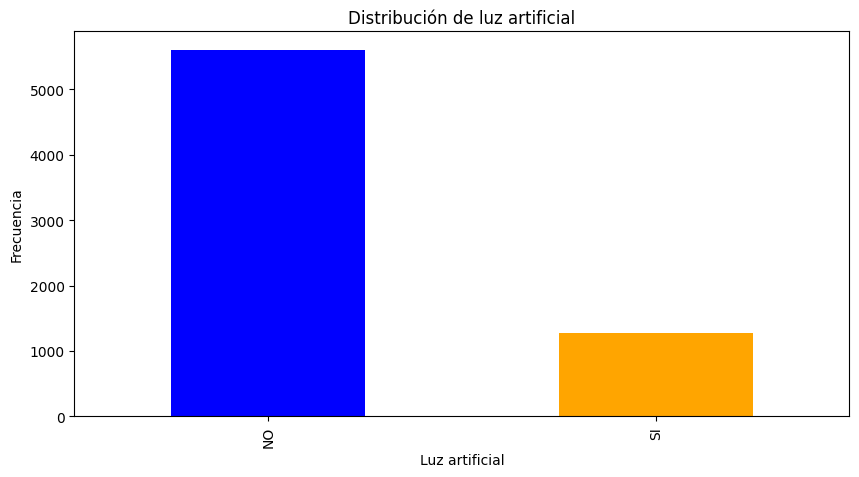

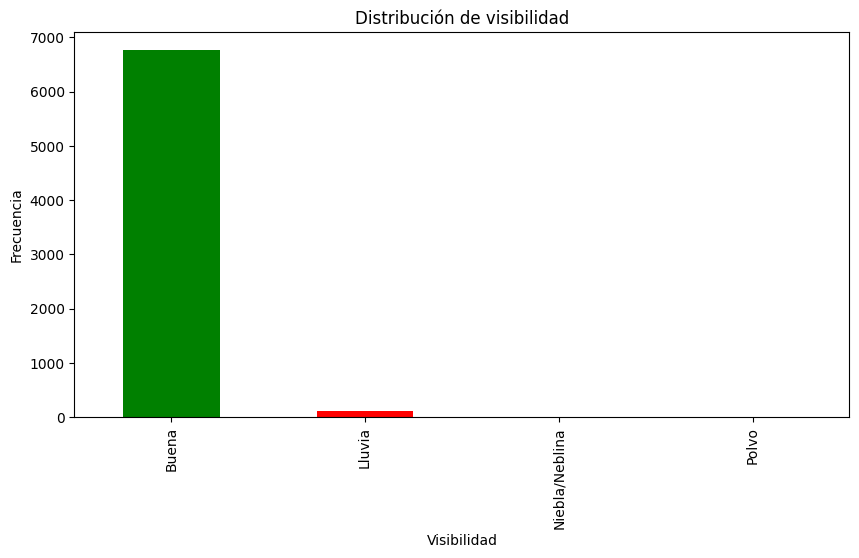

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Gráfico de barras para 'luz_artificial'
plt.figure(figsize=(10,5))
df_siniestros_totales['luz_artificial'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribución de luz artificial')
plt.xlabel('Luz artificial')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de barras para 'visibilidad'
plt.figure(figsize=(10,5))
df_siniestros_totales['visibilidad'].value_counts().plot(kind='bar', color=['green', 'red', 'purple', 'gray'])
plt.title('Distribución de visibilidad')
plt.xlabel('Visibilidad')
plt.ylabel('Frecuencia')
plt.show()


Volvemos a corroborar nuestros datos

In [20]:
utils.verificar_tipo_datos(df_siniestros_totales)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,id_feu,[<class 'int'>],100.00,0.00,0
1,siniestro_fecha,[<class 'pandas._libs.tslibs.timestamps.Timest...,100.00,0.00,0
2,siniestro_hora,[<class 'datetime.time'>],100.00,0.00,0
3,zona_ocurrencia,"[<class 'str'>, <class 'NoneType'>]",99.13,0.87,60
4,via_publica,"[<class 'str'>, <class 'NoneType'>]",97.63,2.37,163
5,nombre_via,"[<class 'str'>, <class 'NoneType'>]",99.55,0.45,31
6,altura_km,"[<class 'str'>, <class 'NoneType'>]",91.25,8.75,602
7,entre_calle_1,"[<class 'str'>, <class 'NoneType'>]",79.16,20.84,1434
8,latitud,[<class 'float'>],100.00,0.00,0
9,longitud,[<class 'float'>],100.00,0.00,0


Normalizamos y borramos las últimas columnas

In [21]:
# Mostrar las primeras filas de las columnas de interés
print(df_siniestros_totales[['material_de_la_calzada', 'estado_de_la_calzada', 'estado_fisico_ambiental', 'luminosidad', 'estado_ambiental', 'visibilidad' ]].head())

# Mostrar el resumen de las columnas para ver los valores únicos y la cantidad de nulos
print(df_siniestros_totales[['material_de_la_calzada', 'estado_de_la_calzada', 'estado_fisico_ambiental','luminosidad', 'estado_ambiental', 'visibilidad']].describe(include='all'))

# Contar los valores nulos en cada columna
nulos_material_de_la_calzada = df_siniestros_totales['material_de_la_calzada'].isnull().sum()
nulos_estado_de_la_calzada = df_siniestros_totales['estado_de_la_calzada'].isnull().sum()
nulos_estado_fisico_ambiental = df_siniestros_totales['estado_fisico_ambiental'].isnull().sum()
nulos_luminosidad = df_siniestros_totales['luminosidad'].isnull().sum()
nulos_estado_ambiental = df_siniestros_totales['estado_ambiental'].isnull().sum()
nulos_visibilidad = df_siniestros_totales['visibilidad'].isnull().sum()

print(f"Valores nulos en material_de_la_calzada: {nulos_material_de_la_calzada}")
print(f"Valores nulos en estado_de_la_calzada: {nulos_estado_de_la_calzada}")
print(f"Valores nulos en estado_de_la_calzada: {nulos_estado_fisico_ambiental}")
print(f"Valores nulos en estado_de_la_calzada: {nulos_luminosidad}")
print(f"Valores nulos en estado_de_la_calzada: {nulos_estado_ambiental}")
print(f"Valores nulos en estado_de_la_calzada: {nulos_visibilidad}")

  material_de_la_calzada estado_de_la_calzada estado_fisico_ambiental  \
0               Hormigón                 Apto                    Seca   
1               Hormigón                 Apto                    Seca   
2               Hormigón                 Apto                    Seca   
3                 Tierra                 None         Despejada, Seca   
4                 Tierra                 None         Despejada, Seca   

  luminosidad estado_ambiental visibilidad  
0   Atardecer        Despejado       Buena  
1   Atardecer        Despejado       Buena  
2   Atardecer        Despejado       Buena  
3       Noche          Nublado       Buena  
4       Noche          Nublado       Buena  
       material_de_la_calzada estado_de_la_calzada estado_fisico_ambiental  \
count                    6713                 6694                    6460   
unique                      7                    6                      10   
top                   Asfalto                 Apto       

Como se puede observar, estas columnas contienen datos que podrían ser redundantes. Por lo cual, se decide eliminarlas. Dejando únicamente la columna 'estado_ambiental' con el nombre 'condiciones_climaticas'.

In [22]:
# Borrar las columnas 'estado_fisico_ambiental', 'luminosidad' y 'visibilidad'
df_siniestros_totales.drop(columns=['estado_fisico_ambiental', 'luminosidad', 'visibilidad', 'nombre_via', 'altura_km', 'entre_calle_1', 'siniestro_fecha', 'vehiculos'], inplace=True)

# Renombrar la columna 'estado_ambiental' a 'condiciones_climaticas'
df_siniestros_totales.rename(columns={'estado_ambiental': 'condiciones_climaticas'}, inplace=True)
df_siniestros_totales.rename(columns={'siniestro_hora': 'hora'}, inplace=True)
df_siniestros_totales.rename(columns={'zona_ocurrencia': 'zona'}, inplace=True)
df_siniestros_totales.rename(columns={'tipo_involucrado': 'vehiculo'}, inplace=True)
df_siniestros_totales.rename(columns={'via_publica': 'tipo_via'}, inplace=True)
df_siniestros_totales.rename(columns={'tipo_siniestro_unico': 'tipo_siniestro'}, inplace=True)
df_siniestros_totales.rename(columns={'cantidad_de_involucrados': 'vehiculos_involucrados'}, inplace=True)

# Verificar el resultado
print(df_siniestros_totales.head())

   id_feu      hora    zona tipo_via   latitud  longitud  ilesos  heridos  \
0   49056  20:10:00  Urbana  Avenida -27.48105 -58.80054     1.0      2.0   
1   49056  20:10:00  Urbana  Avenida -27.48105 -58.80054     1.0      2.0   
2   49056  20:10:00  Urbana  Avenida -27.48105 -58.80054     1.0      2.0   
3   49059  19:30:00  Urbana    Calle -27.48406 -58.77596     1.0      1.0   
4   49059  19:30:00  Urbana    Calle -27.48406 -58.77596     1.0      1.0   

   fallecidos  peatones  ... condiciones_climaticas      semaforo  \
0         0.0       0.0  ...              Despejado      Funciona   
1         0.0       0.0  ...              Despejado      Funciona   
2         0.0       0.0  ...              Despejado      Funciona   
3         0.0       0.0  ...                Nublado  Sin Semáforo   
4         0.0       0.0  ...                Nublado  Sin Semáforo   

      vehiculo  anio mes dia cruce                 lugar_del_hecho  \
0  Motocicleta  2018  10  29    SI  AV INDEPENDENCIA

In [23]:
# Reemplazar los valores nulos en la columna 'vehiculo' por una cadena vacía
df_siniestros_totales['vehiculo'] = df_siniestros_totales['vehiculo'].fillna('')

# Agrupar por 'id_feu' y concatenar todos los vehículos, sin eliminar duplicados
df_siniestros_totales_grouped = df_siniestros_totales.groupby('id_feu').agg({
    'vehiculo': lambda x: ', '.join(x),  # Concatenar todos los vehículos, sin eliminar duplicados
}).reset_index()

# Guardar el dataset sin duplicados, pero con los vehículos concatenados
df_siniestros_totales_cleaned = df_siniestros_totales.drop_duplicates(subset=['id_feu'], keep='first').drop(columns=['vehiculo'])

# Combinar con los vehículos agrupados
df_siniestros_totales_cleaned = df_siniestros_totales_cleaned.merge(df_siniestros_totales_grouped[['id_feu', 'vehiculo']], on='id_feu')

# Revisar el resultado
df_siniestros_totales_cleaned.head()




,id_feu,hora,zona,tipo_via,latitud,longitud,ilesos,heridos,fallecidos,peatones,...,condiciones_climaticas,semaforo,anio,mes,dia,cruce,lugar_del_hecho,es_colision,tipo_siniestro_para_grafico,vehiculo
0,49056,20:10:00,Urbana,Avenida,-27.48105,-58.80054,1.0,2.0,0.0,0.0,...,Despejado,Funciona,2018,10,29,SI,AV INDEPENDENCIA y LAS PIEDRAS,Real,Colisión entre vehículos,"Motocicleta, Motocicleta, Automóvil"
1,49059,19:30:00,Urbana,Calle,-27.48406,-58.77596,1.0,1.0,0.0,0.0,...,Nublado,Sin Semáforo,2018,10,31,SI,BELASCOAIN y VIUDES,Real,Colisión entre vehículos,"Motocicleta, Automóvil"
2,48998,13:10:00,Urbana,Calle,-27.47203,-58.83722,1.0,1.0,0.0,0.0,...,Despejado,Sin Semáforo,2018,10,8,SI,BELGRANO y SAN JUAN,Real,Colisión entre vehículos,"Automóvil, Motocicleta"
3,49069,07:15:00,Urbana,Avenida,-27.47631,-58.83009,2.0,1.0,0.0,0.0,...,Despejado,Funciona,2018,11,5,SI,AVENIDA FERRE y ESPAÑA,Real,Colisión entre vehículos,"Automóvil, Motocicleta, Motocicleta"
4,48869,10:30:00,Urbana,Calle,-27.46437,-58.83526,1.0,1.0,0.0,0.0,...,Despejado,Sin Semáforo,2018,8,25,SI,MENDOZA y 25 DE mayo,Real,Colisión entre vehículos,"Automóvil, Automóvil"


Por último, normalizamos los pocos datos nulos que nos quedan.

In [25]:
# Completar valores nulos en todas las columnas numéricas con la media
for column in df_siniestros_totales_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    df_siniestros_totales_cleaned[column].fillna(df_siniestros_totales_cleaned[column].mean(), inplace=True)

# Completar valores nulos en todas las columnas categóricas con la moda
for column in df_siniestros_totales_cleaned.select_dtypes(include=['object']).columns:
    df_siniestros_totales_cleaned[column].fillna(df_siniestros_totales_cleaned[column].mode()[0], inplace=True)


Guardamos este dataframe correcto

In [27]:
# Guardar el dataset combinado en un nuevo archivo Parquet, para que mantenga sus types.
df_siniestros_totales_cleaned.to_parquet('../Datasets_limpios/siniestrosfinal.parquet', index=False)